In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



import torch

from torch import nn

from torch.optim import Adam

from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score



from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout



from tqdm import tqdm

tqdm.pandas()

from collections import Counter

In [6]:
# read data
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Training_Essay_Data.csv' 
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(29145, 2)


,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


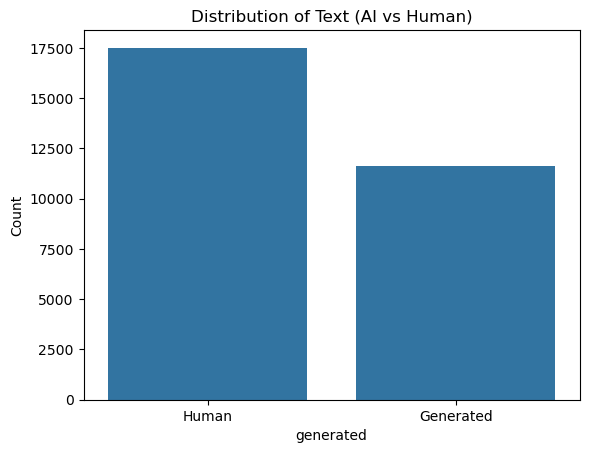

Count of Human vs Generated text:
generated
0    17508
1    11637
Name: count, dtype: int64


In [7]:
# Plot the distribution of the 'generated & Humans' labels

ax = sns.countplot(x=df['generated'])

plt.title('Distribution of Text (AI vs Human)')

plt.ylabel('Count')

plt.xticks([0, 1], ['Human', 'Generated'])

plt.show()



# Print the count

generated_count = df['generated'].value_counts()

print(f"Count of Human vs Generated text:\n{generated_count}")

In [8]:
# length of the longest and smallest text

print(f"Length of the longest text: {df['text'].str.len().max()}")

print(f"Length of the smallest text: {df['text'].str.len().min()}")

Length of the longest text: 9157
Length of the smallest text: 1


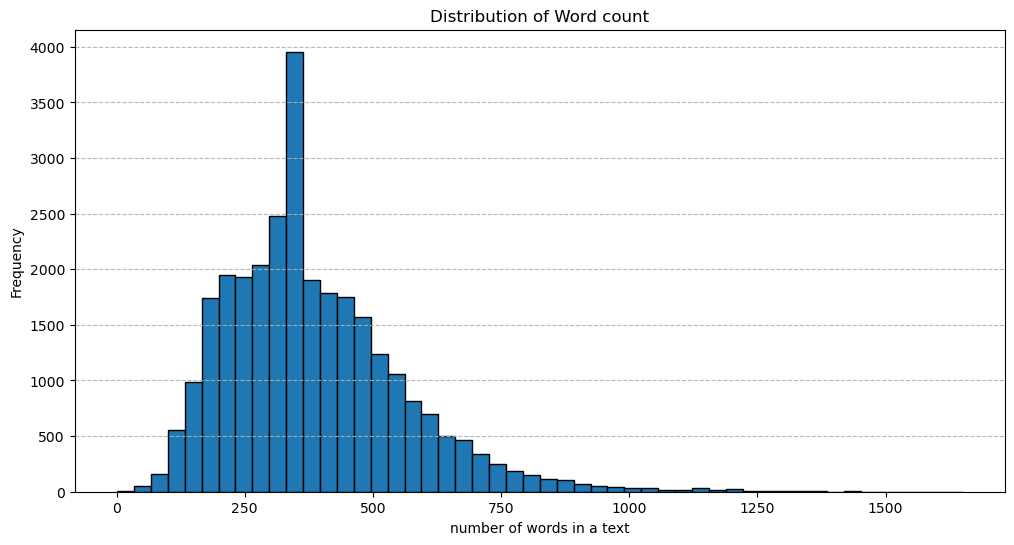

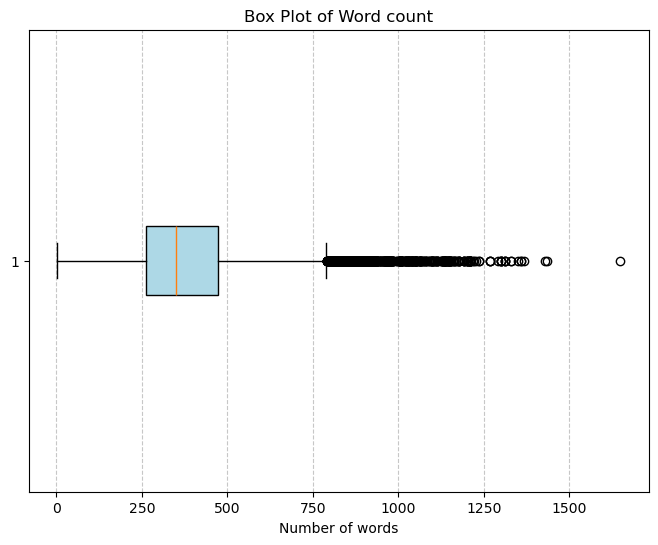

Average word count: 383.14
Median  word count: 351
Minimum word count: 1
Maximum word count: 1650


In [9]:
# Distribution chart of word counts



# Calculate text lengths

text_lengths = [len(text.split()) for text in df['text']]



# Plot the histogram

plt.figure(figsize=(12, 6))

plt.hist(text_lengths, bins=50,  edgecolor='black')

plt.title('Distribution of Word count')

plt.xlabel('number of words in a text')

plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()



# Plot the box plot

plt.figure(figsize=(8, 6))

plt.boxplot(text_lengths, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Box Plot of Word count')

plt.xlabel('Number of words')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



# Print stats

print(f"Average word count: {sum(text_lengths) / len(text_lengths):.2f}")

print(f"Median  word count: {sorted(text_lengths)[len(text_lengths) // 2]}")

print(f"Minimum word count: {min(text_lengths)}")

print(f"Maximum word count: {max(text_lengths)}")

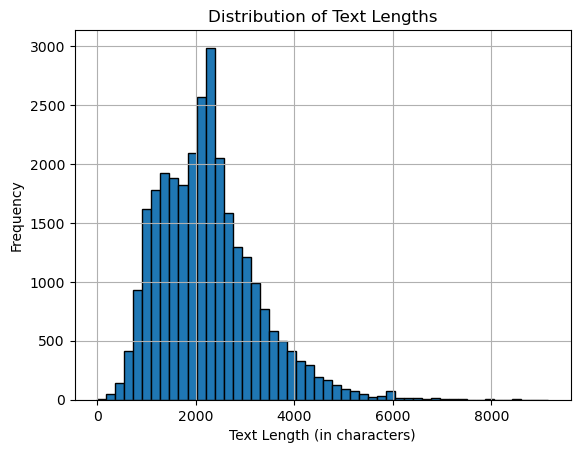

Mean   text length: 2235.996740435752
Median text length: 2158.0
Max    text length: 9157
Min    text length: 1


In [10]:
# Distribution graph for text lengths



# Calculate the length of each text (in characters)

text_lengths = df['text'].apply(len)

plt.hist(text_lengths, bins=50, edgecolor='black')

plt.title('Distribution of Text Lengths')

plt.xlabel('Text Length (in characters)')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()



# print stats

print("Mean   text length:", np.mean(text_lengths))

print("Median text length:", np.median(text_lengths))

print("Max    text length:", np.max(text_lengths))

print("Min    text length:", np.min(text_lengths))

In [11]:
# Filter texts with word counts between 170 and 500 for an even distribution and helps model for better generalization

filtered_by_word_count_df = df[df['text'].apply(lambda x: 170 <= len(x.split()) <= 500)]

# print the shape of the filtered DataFrame

print(f"Filtered DataFrame shape: {filtered_by_word_count_df.shape}")

Filtered DataFrame shape: (21118, 2)


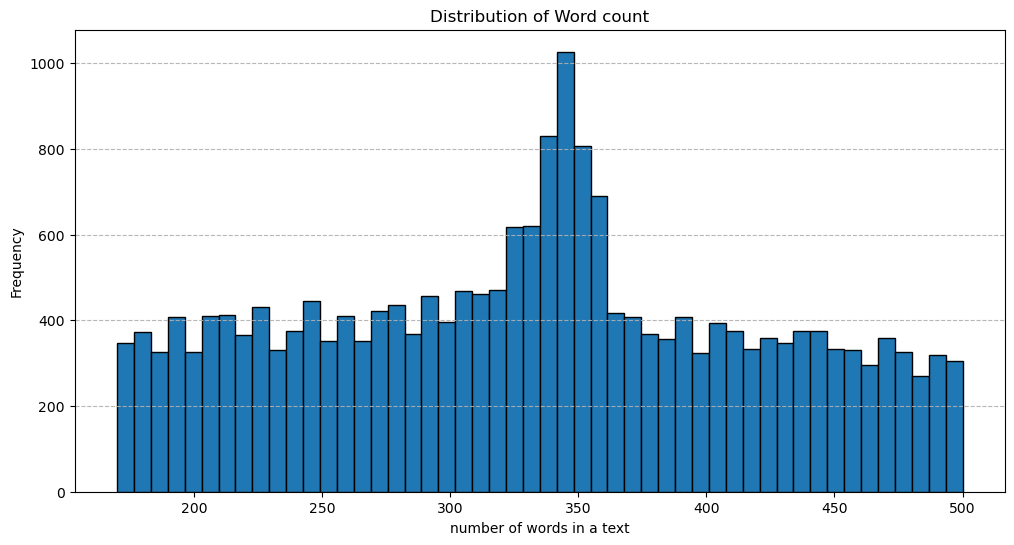

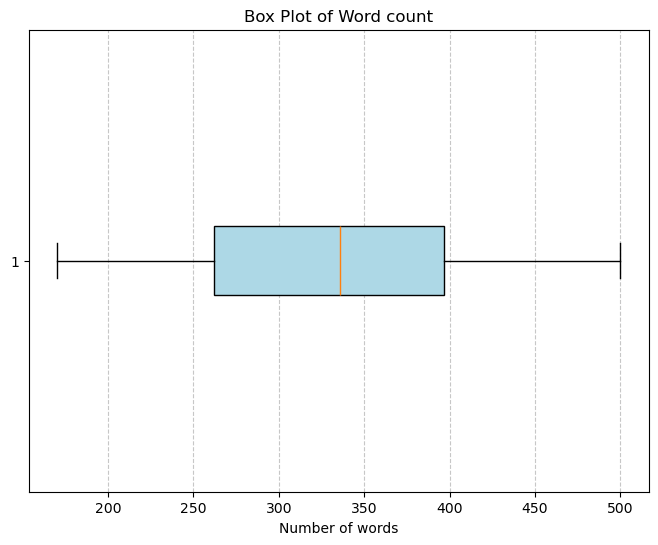

Average word count: 331.64
Median  word count: 336
Minimum word count: 170
Maximum word count: 500


In [12]:
# Distribution after filtering by word count



text_lengths = [len(text.split()) for text in filtered_by_word_count_df['text']]



plt.figure(figsize=(12, 6))

plt.hist(text_lengths, bins=50,  edgecolor='black')

plt.title('Distribution of Word count')

plt.xlabel('number of words in a text')

plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()



plt.figure(figsize=(8, 6))

plt.boxplot(text_lengths, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Box Plot of Word count')

plt.xlabel('Number of words')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



print(f"Average word count: {sum(text_lengths) / len(text_lengths):.2f}")

print(f"Median  word count: {sorted(text_lengths)[len(text_lengths) // 2]}")

print(f"Minimum word count: {min(text_lengths)}")

print(f"Maximum word count: {max(text_lengths)}")

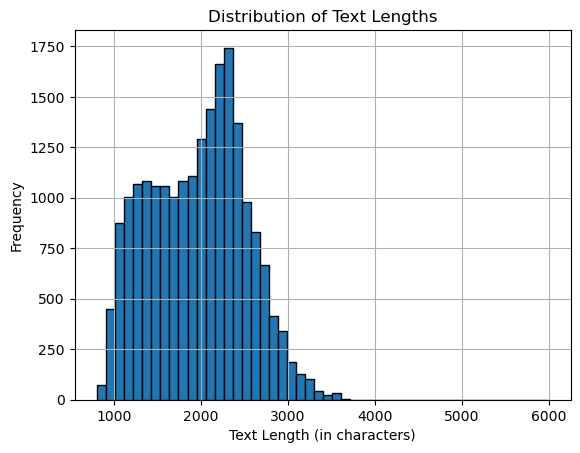

Mean   text length: 1956.1594847996969
Median text length: 2002.0
Max    text length: 5995
Min    text length: 805


In [13]:

# Calculate the length of each text (in characters)

text_lengths = filtered_by_word_count_df['text'].apply(len)



plt.hist(text_lengths, bins=50, edgecolor='black')

plt.title('Distribution of Text Lengths')

plt.xlabel('Text Length (in characters)')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()



# print stats

print("Mean   text length:", np.mean(text_lengths))

print("Median text length:", np.median(text_lengths))

print("Max    text length:", np.max(text_lengths))

print("Min    text length:", np.min(text_lengths))

Number of texts remaining after filtering: 20562


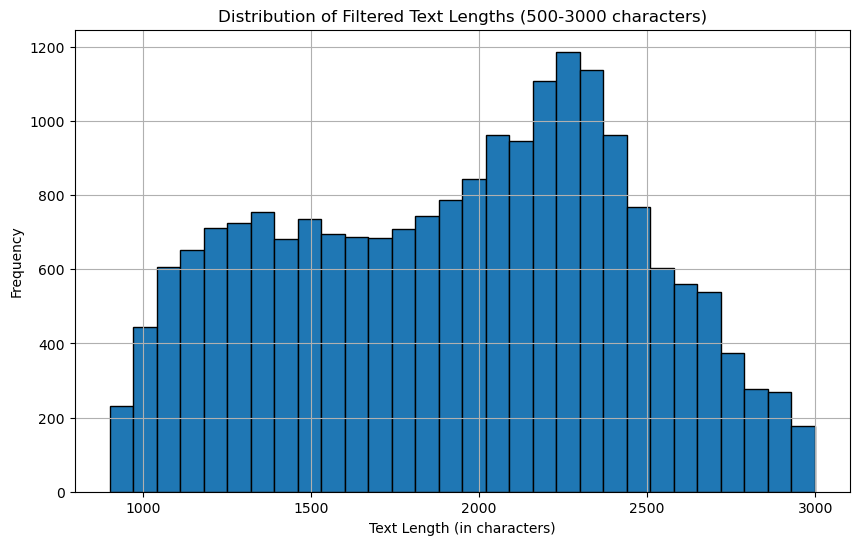

In [14]:
filtered_data = filtered_by_word_count_df[(filtered_by_word_count_df['text'].apply(len) >= 900) & (filtered_by_word_count_df['text'].apply(len) <= 3000)]



# number of texts remaining after filtering

print(f"Number of texts remaining after filtering: {len(filtered_data)}")



# Plotting the distribution of filtered text lengths

filtered_text_lengths = filtered_data['text'].apply(len)

plt.figure(figsize=(10, 6))

plt.hist(filtered_text_lengths, bins=30, edgecolor='black')

plt.title('Distribution of Filtered Text Lengths (500-3000 characters)')

plt.xlabel('Text Length (in characters)')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

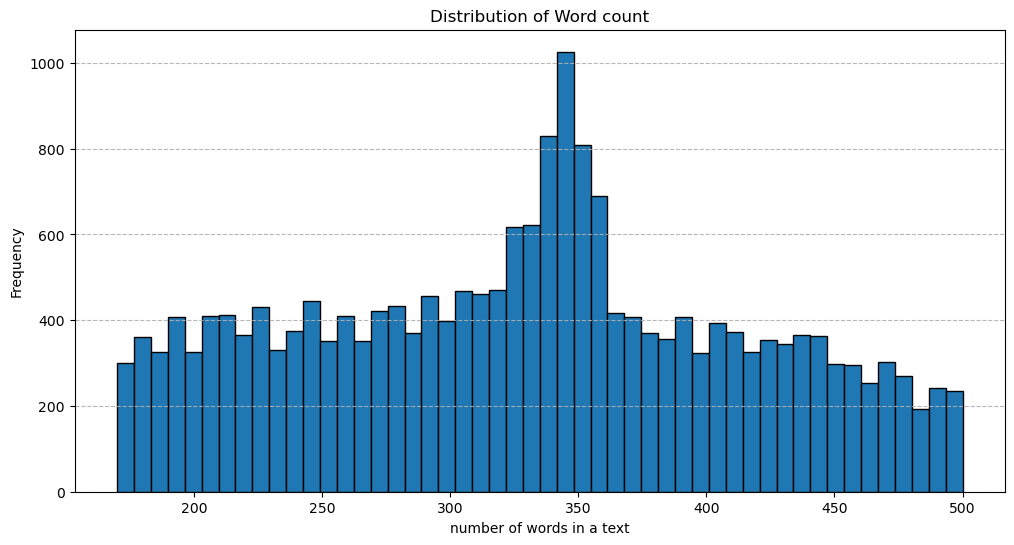

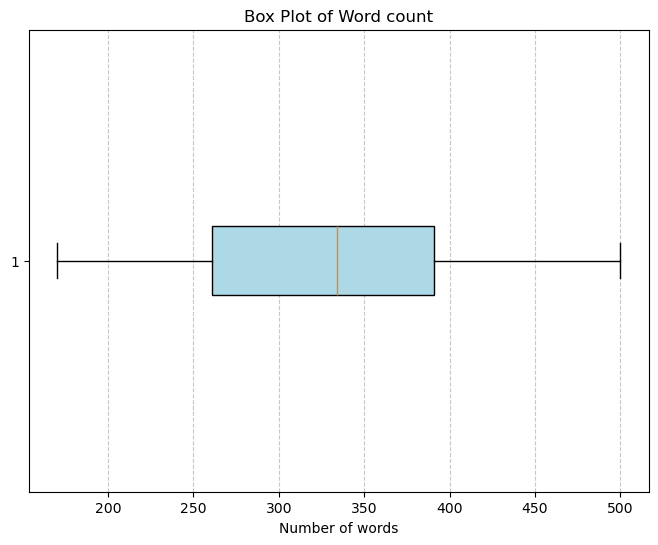

Average word count: 328.73
Median  word count: 334
Minimum word count: 170
Maximum word count: 500


In [15]:
# Calculate text lengths

text_lengths = [len(text.split()) for text in filtered_data['text']]



# Plot the histogram

plt.figure(figsize=(12, 6))

plt.hist(text_lengths, bins=50,  edgecolor='black')

plt.title('Distribution of Word count')

plt.xlabel('number of words in a text')

plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()



# Plot the box plot

plt.figure(figsize=(8, 6))

plt.boxplot(text_lengths, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Box Plot of Word count')

plt.xlabel('Number of words')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



# Print stats

print(f"Average word count: {sum(text_lengths) / len(text_lengths):.2f}")

print(f"Median  word count: {sorted(text_lengths)[len(text_lengths) // 2]}")

print(f"Minimum word count: {min(text_lengths)}")

print(f"Maximum word count: {max(text_lengths)}")

In [16]:
filtered_data.shape

(20562, 2)

In [17]:
df = filtered_data

In [18]:
generated_count = df['generated'].sum()

human_indices = df[df['generated'] == 0].index

generated_indices = df[df['generated'] == 1].index

# Convert human indices to a pandas Series and sample the same number as generated

human_sampled_indices = pd.Series(human_indices).sample(n=generated_count, random_state=42)

# Create a new balanced dataframe

balanced_df = pd.concat([df.loc[generated_indices], df.loc[human_sampled_indices]])

# Shuffle the dataframe to mix both samples

balanced_df = shuffle(balanced_df, random_state=42)

# print the new distribution

print('Balanced dataset distribution:')

print(balanced_df['generated'].value_counts())

# reset the index

balanced_df = balanced_df.reset_index(drop=True)

Balanced dataset distribution:
generated
0    8774
1    8774
Name: count, dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_9856\2100307099.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=balanced_df['generated'], palette='Set2')


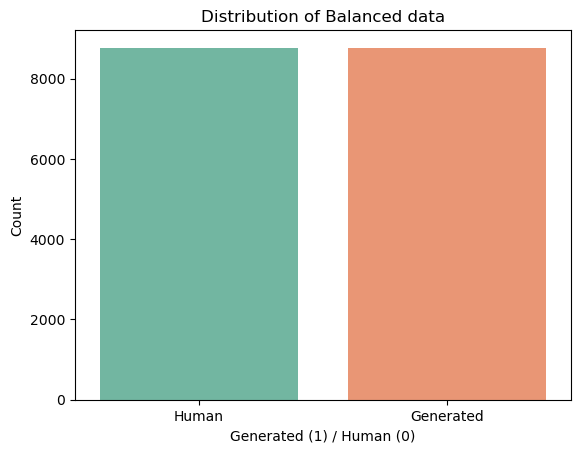

Exact count of labels in 'generated' column:
generated
0    8774
1    8774
Name: count, dtype: int64


In [19]:
ax = sns.countplot(x=balanced_df['generated'], palette='Set2')

plt.title('Distribution of Balanced data')

plt.xlabel('Generated (1) / Human (0)')

plt.ylabel('Count')

plt.xticks([0, 1], ['Human', 'Generated'])

plt.show()

# Print the count

generated_count = balanced_df['generated'].value_counts()

print(f"Exact count of labels in 'generated' column:\n{generated_count}")

In [20]:
text = balanced_df.text.values

words = ' '.join(text)

words = words.split() 



# build vocabulary

vocab = sorted(Counter(words), key=Counter(words).get, reverse=True)

ID2W = dict(enumerate(vocab, 1))

ID2W[0] = '<PAD>' # special word for paddding purpose, and the index is 0

vectorizer = {word: ID for ID, word in ID2W.items()}

vectorizer

{'the': 1,
 'to': 2,
 'and': 3,
 'of': 4,
 'a': 5,
 'is': 6,
 'that': 7,
 'in': 8,
 'for': 9,
 'can': 10,
 'it': 11,
 'be': 12,
 'are': 13,
 'you': 14,
 'on': 15,
 'they': 16,
 'have': 17,
 'or': 18,
 'people': 19,
 'not': 20,
 'their': 21,
 'with': 22,
 'more': 23,
 'as': 24,
 'The': 25,
 'this': 26,
 'we': 27,
 'I': 28,
 'by': 29,
 'would': 30,
 'from': 31,
 'because': 32,
 'In': 33,
 'has': 34,
 'will': 35,
 'an': 36,
 'but': 37,
 'also': 38,
 'if': 39,
 'our': 40,
 'your': 41,
 'about': 42,
 'This': 43,
 'should': 44,
 'there': 45,
 'like': 46,
 'help': 47,
 'could': 48,
 'when': 49,
 'one': 50,
 'make': 51,
 'was': 52,
 'how': 53,
 'students': 54,
 'than': 55,
 'what': 56,
 'many': 57,
 'may': 58,
 'who': 59,
 'all': 60,
 'just': 61,
 'do': 62,
 'other': 63,
 'them': 64,
 'at': 65,
 'car': 66,
 'which': 67,
 'get': 68,
 'so': 69,
 'some': 70,
 'use': 71,
 'It': 72,
 'while': 73,
 'time': 74,
 'think': 75,
 'new': 76,
 'such': 77,
 'vote': 78,
 'better': 79,
 'even': 80,
 'only': 8

In [21]:
print('Text sample:', text[0])

num_vec = [vectorizer[w] for w in text[0].split()]

print('Coverted vector:',  len(num_vec), num_vec,)

Text sample: Electoral college has helped in many ways. Many people have suggested keeping the electoral college or changing to election by popular vote for the president of United States. I believe that changing to election by popular vote for the president would be best bescause first the more people who vote its easier to determine who would become president and because it will aviod any problems having to choose for president. Changing the election by popular vote can change things in the united states.

Now a days  alot of things have helped the electoral college but in other cases it has not . Changing to election by popular vote can help by choosing the winner and still having its defenders. Also it may help by when they need to find out the winner they know exactly who it is . They can get their election faster and quicker by changing the election vote to the most popular vote for the united states. People still suggest that keeping the electoral college would be better but chn

In [22]:
# text vectorization and padding

vecs = [[vectorizer[w] for w in r.split()] for r in tqdm(text)]



# Seq length = 340 which is little more than median and more than average word count

seq_length = 340

    

X = np.full((len(vecs), seq_length), 0, dtype=int)

for i, vec in enumerate(vecs):

    X[i, :len(vec)] = np.array(vec)[:seq_length]



print('Text vectors:', X.shape)

Y = balanced_df.generated.to_numpy()

print('Labels:', Y.shape)

100%|██████████| 17548/17548 [00:01<00:00, 11136.31it/s]


Text vectors: (17548, 340)
Labels: (17548,)


In [23]:
print('Original vector:', vec[0])

print('Results with padding:', X[0])

Original vector: 1512
Results with padding: [   92   128    34  1328     8    57  1055   356    19    17  5546   834
     1   107   128    18   739     2   263    29   121    78     9     1
   194     4   308   971    28   105     7   739     2   263    29   121
    78     9     1   194    30    12   168 30944   215     1    23    19
    59    78    99   396     2  1544    59    30   143   194     3    32
    11    35 13996   113   438   138     2   373     9   442  5062     1
   263    29   121    78    10   199   125     8     1  1752   825  1160
     5   477   930     4   125    17  1328     1   107   128    37     8
    63  2121    11    34    20   129  5062     2   263    29   121    78
    10    47    29   890     1  1204     3   169   138    99 13074   486
    11    58    47    29    49    16   102     2   187    89     1  1204
    16    90  1628    59    11     6   129   117    10    68    21   263
  1285     3  3807    29   739     1   263    78     2     1   104   121
    78 

In [24]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)



print("Train set:", X_train.shape, Y_train.shape)

print("Validation set:", X_val.shape, Y_val.shape)

print("Test set:", X_test.shape, Y_test.shape)



batch_size = 128

train_data = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(Y_train, dtype=torch.float)), batch_size=batch_size, shuffle=True)

val_data = DataLoader(TensorDataset(torch.tensor(X_val, dtype=torch.long), torch.tensor(Y_val, dtype=torch.float)), batch_size=batch_size)

test_data = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.long), torch.tensor(Y_test, dtype=torch.float)), batch_size=batch_size)

Train set: (12283, 340) (12283,)
Validation set: (2632, 340) (2632,)
Test set: (2633, 340) (2633,)


In [25]:
vocab_size = len(vectorizer)  # Number of unique words in your vocabulary

embedding_dim = 340

seq_length = 340  # Max sequence length

num_classes = 1



inputs = Input(shape=(seq_length,))

embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length)(inputs)

cnn = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(embedding)

cnn = BatchNormalization()(cnn)

cnn = MaxPooling1D(pool_size=4)(cnn)

cnn = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(cnn)

cnn = BatchNormalization()(cnn)

cnn = MaxPooling1D(pool_size=2)(cnn)

lstm = LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(cnn)

lstm = LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)(lstm)

dense = Dense(256, activation='relu')(lstm)

dense = Dropout(0.5)(dense)

dense = Dense(128, activation='relu')(dense)

dense = Dropout(0.5)(dense)

dense = Dense(64, activation='relu')(dense)

outputs = Dense(num_classes, activation='sigmoid')(dense)



model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 340)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 340, 340)       │    38,910,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 340, 128)       │       217,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 340, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 85, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 85, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 85, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 42, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 42, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,533,169 (150.81 MB)

 Trainable params: 39,532,401 (150.80 MB)

 Non-trainable params: 768 (3.00 KB)

In [26]:
history = model.fit(train_data, epochs=10, batch_size=batch_size, validation_data=val_data, verbose=1)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7489 - loss: 0.4418 - val_accuracy: 0.6976 - val_loss: 0.5583
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9920 - loss: 0.0350 - val_accuracy: 0.8632 - val_loss: 0.4740
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.8176 - val_loss: 0.4850
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9840 - val_loss: 0.0874
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9998 - loss: 9.9753e-04 - val_accuracy: 0.9905 - val_loss: 0.0385
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9878 - val_loss: 0.0444
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9871 - val_loss: 0.0642
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9920 - v

In [27]:
test_loss, test_acc = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")

print(f"Test Accuracy: {test_acc}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.9945 - loss: 0.0233
Test Loss: 0.04161236062645912
Test Accuracy: 0.9924041032791138


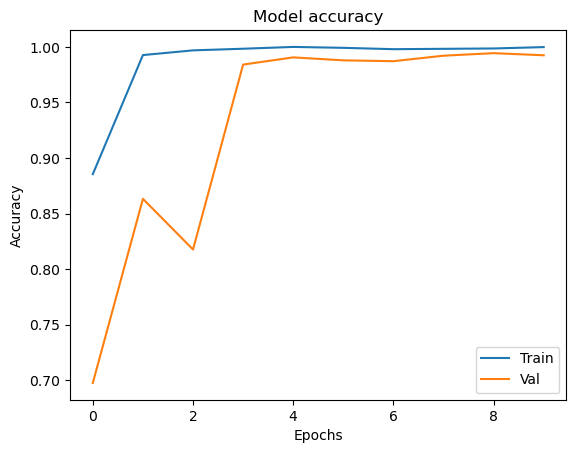

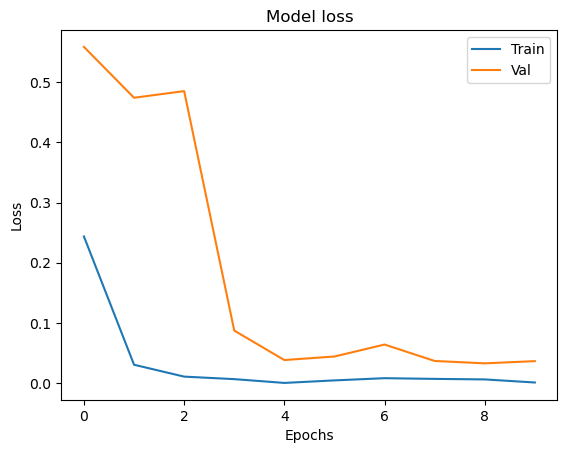

In [28]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(['Train', 'Val'])

plt.show()



# Plot training & validation loss 

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(['Train', 'Val'])

plt.show()

In [29]:
# Predict probabilities

y_pred_prob = model.predict(test_data)

# Convert probabilities to binary (0 or 1)

y_pred = (y_pred_prob > 0.5).astype(int)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step


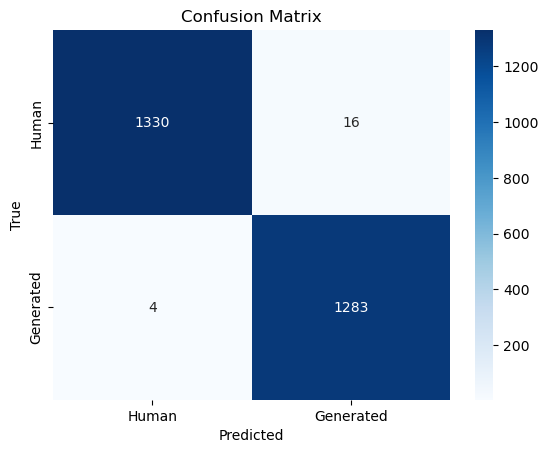

In [30]:
# Print the confusion matrix

conf_matrix = confusion_matrix(Y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Generated'], yticklabels=['Human', 'Generated'])

plt.xlabel('Predicted')

plt.ylabel('True')

plt.title('Confusion Matrix')

plt.show()

In [31]:
precision = precision_score(Y_test, y_pred)

print("Precision:", precision)

Precision: 0.9876828329484219


In [32]:
recall = recall_score(Y_test, y_pred)

print("Recall:", recall)

Recall: 0.9968919968919969


In [33]:
f1 = f1_score(Y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.9922660479505027


In [34]:
print(classification_report(Y_test, y_pred, target_names=['Human', 'Generated']))

              precision    recall  f1-score   support

       Human       1.00      0.99      0.99      1346
   Generated       0.99      1.00      0.99      1287

    accuracy                           0.99      2633
   macro avg       0.99      0.99      0.99      2633
weighted avg       0.99      0.99      0.99      2633

